## Getting started with SentinelHub

SentinelHub provides a GUI for you to easily access a range of satellite data assets (from Sentinel missions to Landsat and other providers).

They do quite a bit of the backend work for you, and make it easier to download imagery assets without worrying too much about synchronization, storage, processing, de-compression algorithms, meta-data, sensor bands etc.

You will need to sign up by making an account, and then you will be able to begin exporting new imagery data:

https://www.sentinel-hub.com/
    
The benefit is easy access to ***a lot*** of open-source imagery assets. 

## Steps to download data


- Go to the SentinelHub EO browser to get started.
- Search for a place in the browser bar, e.g., Fairfax, VA. 
- By default, you should be ready to search for Sentinel-2 data.
- Click the big lime green search bar.
- Browse the available images - look for ones with low cloud cover (e.g. <5%). Select one.
- Once you have selected an image with a good quality level, you need to draw an Area of Interest (AoI).
- On the right-hand vertical menu, click the pentagon button, and then click the square. 
- Draw your AoI bounding box. Keep it small, e.g. GMU's Fairfax campus boundary.
- Click the download image button on the right-hand vertical menu.
- Select 'Analytical' image from the top tabs. You may need to log in first. Then make sure to select:
    - Image format: 'TIFF (16-bit)'
    - Image resolution: 'HIGH'
    - Select raw bands, e.g., B02, B03, B04 and B08 (corresponding to blue, green, red, nir [https://en.wikipedia.org/wiki/Sentinel-2]).
- Download.


## Visualizing Sentinel-2 data from SentinelHub

Now we have downloaded data layers, we can get started plotting them. 

Remember, we will need `rasterio` to load them in, `numpy` to scale the values, and then `matplotlib` to plot the image. 

This is an example for how we do it manually, for the four bands we have (so for a single image timepoint).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


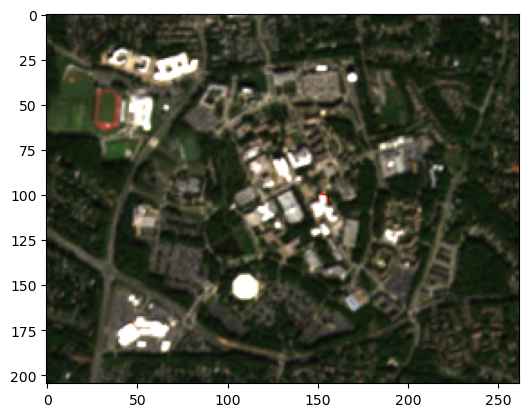

In [1]:
# Example
import rasterio
import numpy as np 
from matplotlib import pyplot

def scale(band): # scale values for display purposes. May need adjusting as per your image. 
    return band / 20000.0

# Load the blue layer given the folder and filename
my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B02_(Raw).tiff')
blue = scale(my_raster_image.read()[0])

# Load the green layer given the folder and filename
my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B03_(Raw).tiff')
green = scale(my_raster_image.read()[0])

# Load the red layer given the folder and filename
my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
red = scale(my_raster_image.read()[0])

# Load the nir layer given the folder and filename
my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B08_(Raw).tiff')
nir = scale(my_raster_image.read()[0])

# Now we need to stack our layers into a single multi-dimensional numpy array
rgb = np.dstack((red, green, blue))

# Visualize the rgb true color composite image
pyplot.imshow(rgb)


These commands should not feel new to you. Generally, we have covered this in quite a bit of depth elsewhere, we just changed the way we read in the layers here (as per our single bands). 

Having these single layer bands now allow us to carry out a range of multispectral process tasks. 

For example, here is the NDVI (again, we have already covered this in other classes):

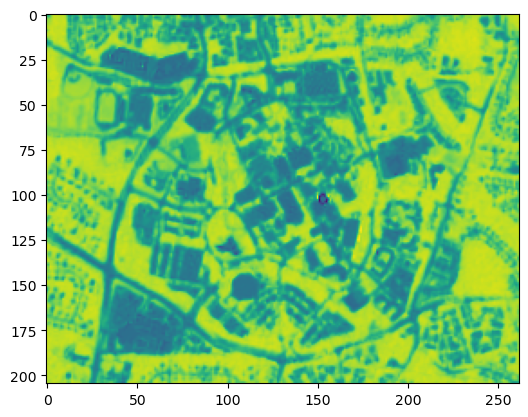

In [2]:
# Example NDVI
import rasterio

def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
red = scale(my_raster_image.read()[0])

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B08_(Raw).tiff')
nir = scale(my_raster_image.read()[0])

ndvi = (nir - red) / (nir + red)

pyplot.imshow(ndvi)

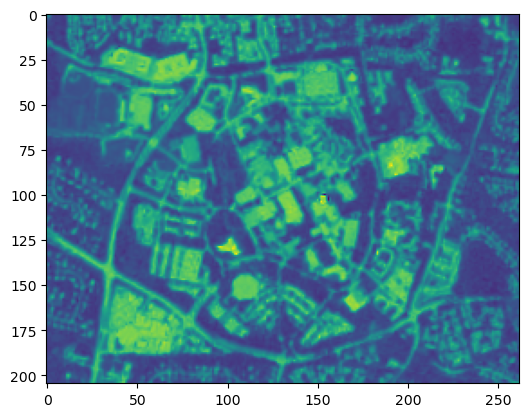

In [3]:
# Example NDWI based on McFeeters (1996)
import rasterio

def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B03_(Raw).tiff')
green = scale(my_raster_image.read()[0])

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B08_(Raw).tiff')
nir = scale(my_raster_image.read()[0])

# Based on McFeeters (1996)
ndwi = (green - nir) / (green + nir)

pyplot.imshow(ndwi)

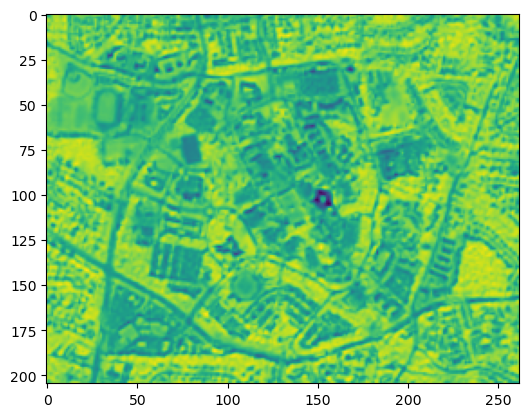

In [4]:
# Example NDWI based on Gao (1996)
import rasterio

def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B08_(Raw).tiff')
nir = scale(my_raster_image.read()[0])

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B11_(Raw).tiff')
swir = scale(my_raster_image.read()[0])

# Based on Gao (1996)
ndwi = (nir - swir) / (nir + swir)

pyplot.imshow(ndwi)

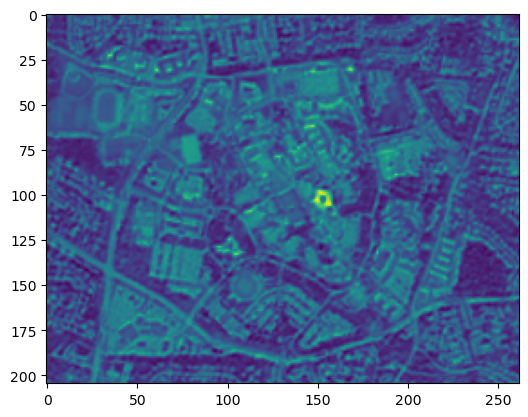

In [5]:
# Example Normalized Difference Built-up Index (NDBI) 
import rasterio

def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B08_(Raw).tiff')
nir = scale(my_raster_image.read()[0])

my_raster_image = rasterio.open('files/2023-10-12-00_00_2023-10-12-23_59_Sentinel-2_L2A_B11_(Raw).tiff')
swir = scale(my_raster_image.read()[0])

ndbi = (swir - nir) / (swir + nir)

pyplot.imshow(ndbi)

## Exercise

- Download a set of multi-spectral image layers from SentinelHub for a mountain area with snow (preferably, containing areas with and without snow). You just need to demonstrate your capability to do this, so keep the image relatively small for speedy processing.
- Implement the Normalized Difference Snow Index (NDSI) (e.g., (green - swir) / (green + swir)). 
- Visualize your result. 
- Extract the areas of snow as a set of shapefiles.